<a href="https://colab.research.google.com/github/OsmarHofman/African-Crisis-Data-Mining/blob/master/Mineracao_Avaliacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [111]:
import pandas as pd 
url = 'https://raw.githubusercontent.com/OsmarHofman/African-Crisis-Data-Mining/master/processed_african_crises.csv'
df = pd.read_csv(url,header=0, sep=',')
df.head()

,country,year,exch_usd,exch_usd_discretized,domestic_debt_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,inflation_discretized,independence,systemic_crisis,inflation_crisis,banking_crisis,exch_usd_discretized_zero,exch_usd_discretized_one,exch_usd_discretized_two,exch_usd_discretized_three,inflation_discretized_zero,inflation_discretized_one,inflation_discretized_two,inflation_discretized_three,currency_crisis
0,Algeria,1870,0.000070,0,False,False,0.0,1.565031e-07,0,False,True,False,True,True,False,False,False,True,False,False,False,no_crisis
1,Algeria,1871,0.000071,0,False,False,0.0,6.434441e-07,0,False,False,False,False,True,False,False,False,True,False,False,False,no_crisis
2,Algeria,1872,0.000070,0,False,False,0.0,-1.691062e-07,0,False,False,False,False,True,False,False,False,True,False,False,False,no_crisis
3,Algeria,1873,0.000069,0,False,False,0.0,5.095067e-07,0,False,False,False,False,True,False,False,False,True,False,False,False,no_crisis
4,Algeria,1874,0.000069,0,False,False,0.0,-1.750166e-07,0,False,False,False,False,True,False,False,False,True,False,False,False,no_crisis


# Mineração de Dados: Aplicação dos Modelos

## ***Modelo 1: Árvore de Decisão***

### **1ª Configuração**: Utilizando entropia como critério do classificador  

In [2]:
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions 
target = 'currency_crisis'
X = df.drop([target], axis=1)
X = pd.get_dummies(X)
y = df[target]

model_tree1 = DecisionTreeClassifier(criterion = 'entropy')
model_tree1.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

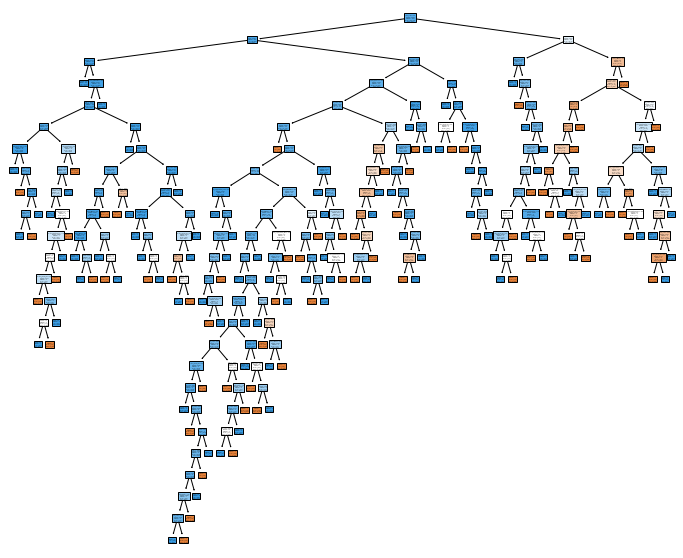

In [3]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

#Visualização dos Nodos
#plt.figure(figsize=(122,22))

#Visualização geral
plt.figure(figsize=(12,10))

plot_tree(model_tree1, filled=True, class_names = y.unique(), feature_names=X.columns)
plt.show()

### **2ª Configuração**: Utilizando um número mínimo de instâncias para um nó folha

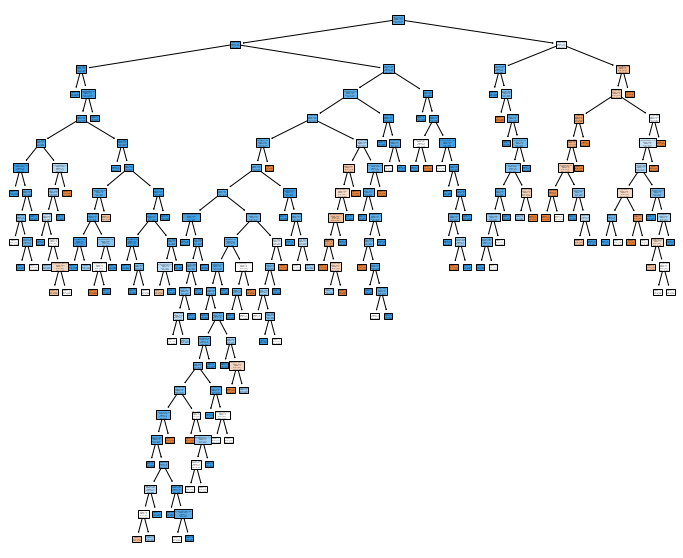

In [4]:
model_tree2 = DecisionTreeClassifier(criterion = 'entropy',min_samples_leaf=2)
model_tree2.fit(X,y)

#Visualização dos Nodos
#plt.figure(figsize=(122,22))

#Visualização geral
plt.figure(figsize=(12,10))

plot_tree(model_tree2, filled=True, class_names = y.unique(), feature_names=X.columns)
plt.show()

### **3ª Configuração**: Mudando os pesos das classes

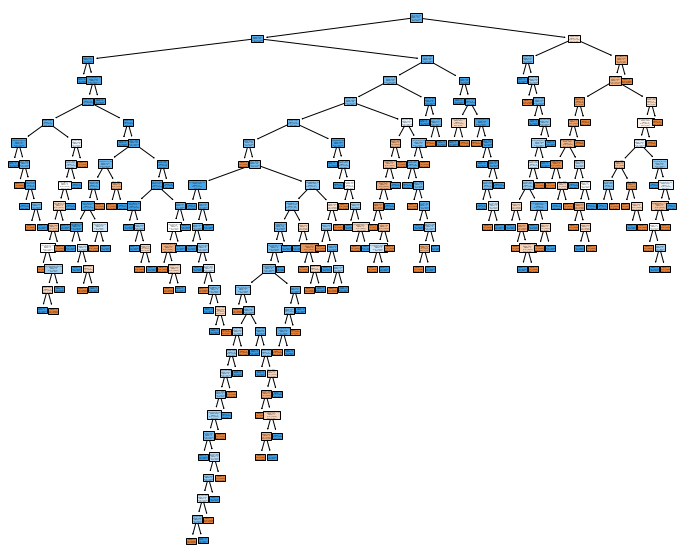

In [5]:
model_tree3 = DecisionTreeClassifier(criterion = 'entropy',class_weight={'crisis':0.6, 'no_crisis': 0.4})
model_tree3.fit(X,y)

#Visualização dos Nodos
#plt.figure(figsize=(122,22))

#Visualização geral
plt.figure(figsize=(12,10))

plot_tree(model_tree3, filled=True, class_names = y.unique(), feature_names=X.columns)
plt.show()

### **4ª Configuração**: Pré-ordenando os dados

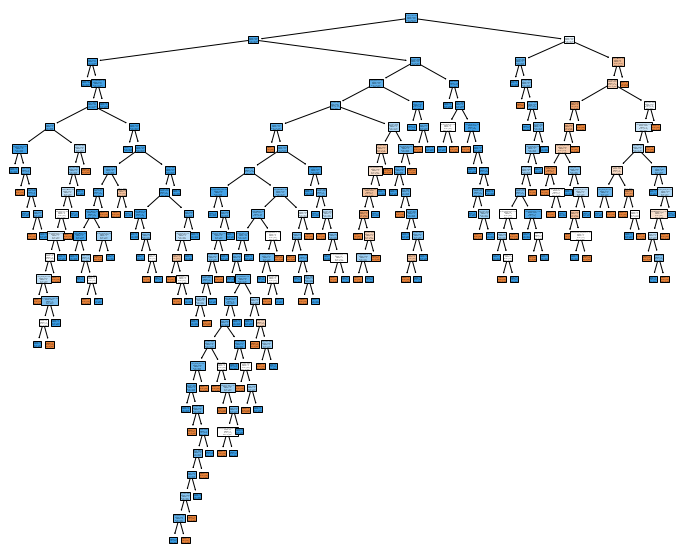

In [6]:
model_tree4 = DecisionTreeClassifier(criterion = 'entropy',presort=True)
model_tree4.fit(X,y)

#Visualização dos Nodos
#plt.figure(figsize=(122,22))

#Visualização geral
plt.figure(figsize=(12,10))

plot_tree(model_tree4, filled=True, class_names = y.unique(), feature_names=X.columns)
plt.show()

### **5ª Configuração**: Pré-ordenando os dados, número mínimo de instâncias para nó folha, e ponderando as classes

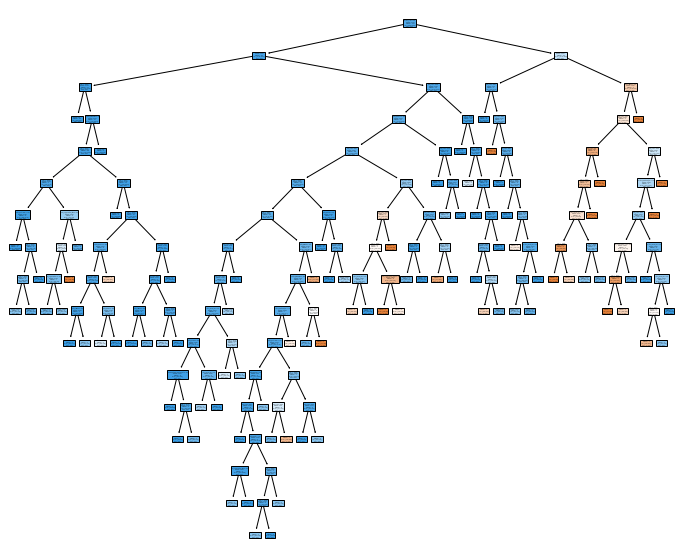

In [7]:
model_tree5 = DecisionTreeClassifier(criterion = 'entropy',presort=True,min_samples_leaf=3,class_weight={'crisis':0.44, 'no_crisis': 0.56})
model_tree5.fit(X,y)

#Visualização dos Nodos
#plt.figure(figsize=(122,22))

#Visualização geral
plt.figure(figsize=(12,10))

plot_tree(model_tree5, filled=True, class_names = y.unique(), feature_names=X.columns)
plt.show()


---
## ***Modelo 2: KNN***

### **1ª Configuração**: Com k=5 com distância Minkowski

In [8]:
from sklearn.neighbors import KNeighborsClassifier
model_knn1 = KNeighborsClassifier(n_neighbors=5, p=3)
model_knn1.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=3,
                     weights='uniform')

### **2ª Configuração**: Com k=3 e ponderando as instâncias mais próximas

In [9]:
model_knn2 = KNeighborsClassifier(n_neighbors=3,weights='distance')
model_knn2.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')

### **3ª Configuração**: Com k=8 e calculando a distância por Manhattan

In [10]:
model_knn3 = KNeighborsClassifier(n_neighbors=5,p=1)
model_knn3.fit(X,y) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=1,
                     weights='uniform')

### **4ª Configuração**: Com k=10, ponderando a distância e usando todos o processadores próximos para realizar os cálculos

In [11]:
model_knn4 = KNeighborsClassifier(n_neighbors=10,weights='distance',n_jobs=-1)
model_knn4.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=10, p=2,
                     weights='distance')

### **5ª Configuração**: Com k=15, ponderando a distância e utilizando distância manhattan

In [12]:
model_knn5 = KNeighborsClassifier(n_neighbors=15,weights='distance',p=1,n_jobs=-1)
model_knn5.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=15, p=1,
                     weights='distance')

---
## ***Modelo 3: SVM***

### **1ª Configuração**: Usando kernel rbf e C=10

In [13]:
from sklearn.svm import SVC
model_svm1 = SVC(C=10,kernel='rbf',gamma='scale')
model_svm1.fit(X,y)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### **2ª Configuração**: Atribuindo C=3, kernel polinomial e gamma scale

In [87]:
model_svm2 = SVC(C=3,kernel='poly',gamma='scale')
model_svm2.fit(X,y)

SVC(C=3, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### **3ª Configuração**: Usando kernel linear

In [86]:
model_svm3 = SVC(kernel='linear',decision_function_shape='ovo',gamma='scale')
model_svm3.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### **4ª Configuração**: Com kernel polinomial e C=8

In [85]:
model_svm4 = SVC(C=8,kernel='poly',gamma='scale')
model_svm4.fit(X,y)

SVC(C=8, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### **5ª Configuração**: Com kernel rbf, C=2 e sem limite de iterações

In [15]:
model_svm5 = SVC(C=2,kernel='rbf',class_weight='balanced',gamma='scale',max_iter=-1)
model_svm5.fit(X,y)

SVC(C=2, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

---
# Avaliação dos Modelos

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=15)

## *Árvore de Decisão*

### **Avaliação por Holdout**

**Conjunto de Treino**

-  Configuração 1:

In [21]:
from sklearn.metrics import confusion_matrix
y_train_pred = model_tree1.predict(X_train)
pd.DataFrame( 
    confusion_matrix(y_train, y_train_pred),
    index = ['observed_crisis','observed_no_crisis'],
    columns = ['predicted_crisis','predicted_no_crisis']
    )

,predicted_crisis,predicted_no_crisis
observed_crisis,82,0
observed_no_crisis,0,551


-  Configuração 2:

In [22]:
y_train_pred = model_tree2.predict(X_train)
pd.DataFrame( 
    confusion_matrix(y_train, y_train_pred),
    index = ['observed_crisis','observed_no_crisis'],
    columns = ['predicted_crisis','predicted_no_crisis']
    )

,predicted_crisis,predicted_no_crisis
observed_crisis,77,5
observed_no_crisis,20,531


-  Configuração 3:

In [23]:
y_train_pred = model_tree3.predict(X_train)
pd.DataFrame( 
    confusion_matrix(y_train, y_train_pred),
    index = ['observed_crisis','observed_no_crisis'],
    columns = ['predicted_crisis','predicted_no_crisis']
    )

,predicted_crisis,predicted_no_crisis
observed_crisis,82,0
observed_no_crisis,0,551


-  Configuração 4:

In [24]:
y_train_pred = model_tree4.predict(X_train)
pd.DataFrame( 
    confusion_matrix(y_train, y_train_pred),
    index = ['observed_crisis','observed_no_crisis'],
    columns = ['predicted_crisis','predicted_no_crisis']
    )

,predicted_crisis,predicted_no_crisis
observed_crisis,82,0
observed_no_crisis,0,551


-  Configuração 5:

In [25]:
y_train_pred = model_tree5.predict(X_train)
pd.DataFrame( 
    confusion_matrix(y_train, y_train_pred),
    index = ['observed_crisis','observed_no_crisis'],
    columns = ['predicted_crisis','predicted_no_crisis']
    )

,predicted_crisis,predicted_no_crisis
observed_crisis,51,31
observed_no_crisis,9,542


Acurácia:

In [26]:
from sklearn.metrics import accuracy_score
acuracia = accuracy_score(y_train, y_train_pred)
acuracia

0.9368088467614534

**Conjunto de Teste**

-  Configuração 1:

In [27]:
y_test_pred = model_tree1.predict(X_test)
pd.DataFrame( 
    confusion_matrix(y_test, y_test_pred),
    index = ['observed_crisis','observed_no_crisis'],
    columns = ['predicted_crisis','predicted_no_crisis']
    )

,predicted_crisis,predicted_no_crisis
observed_crisis,50,0
observed_no_crisis,0,372


-  Configuração 2:

In [28]:
y_test_pred = model_tree2.predict(X_test)
pd.DataFrame( 
    confusion_matrix(y_test, y_test_pred),
    index = ['observed_crisis','observed_no_crisis'],
    columns = ['predicted_crisis','predicted_no_crisis']
    )

,predicted_crisis,predicted_no_crisis
observed_crisis,47,3
observed_no_crisis,10,362


-  Configuração 3:

In [29]:
y_test_pred = model_tree3.predict(X_test)
pd.DataFrame( 
    confusion_matrix(y_test, y_test_pred),
    index = ['observed_crisis','observed_no_crisis'],
    columns = ['predicted_crisis','predicted_no_crisis']
    )

,predicted_crisis,predicted_no_crisis
observed_crisis,50,0
observed_no_crisis,0,372


-  Configuração 4:

In [30]:
y_test_pred = model_tree4.predict(X_test)
pd.DataFrame( 
    confusion_matrix(y_test, y_test_pred),
    index = ['observed_crisis','observed_no_crisis'],
    columns = ['predicted_crisis','predicted_no_crisis']
    )

,predicted_crisis,predicted_no_crisis
observed_crisis,50,0
observed_no_crisis,0,372


-  Configuração 5:

In [31]:
y_test_pred = model_tree5.predict(X_test)
pd.DataFrame( 
    confusion_matrix(y_test, y_test_pred),
    index = ['observed_crisis','observed_no_crisis'],
    columns = ['predicted_crisis','predicted_no_crisis']
    )

,predicted_crisis,predicted_no_crisis
observed_crisis,42,8
observed_no_crisis,6,366


Acurácia:

In [32]:
from sklearn.metrics import accuracy_score
acuracia = accuracy_score(y_test, y_test_pred)
acuracia

0.966824644549763

### **Avaliação por 10-folds cross validation**

-  Configuração 1:

In [33]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(model_tree1, X, y, cv=10)
pd.DataFrame( 
    confusion_matrix(y, y_pred),
    index = ['observed_crisis','observed_no_crisis'],
    columns = ['predicted_crisis','predicted_no_crisis']
    )

,predicted_crisis,predicted_no_crisis
observed_crisis,48,84
observed_no_crisis,595,328


Acurácia:

In [34]:
from sklearn.metrics import accuracy_score
acuracia = accuracy_score(y, y_pred)
acuracia

0.35639810426540286

-  Configuração 2:

In [35]:
y_pred = cross_val_predict(model_tree2, X, y, cv=10)
pd.DataFrame( 
    confusion_matrix(y, y_pred),
    index = ['observed_crisis','observed_no_crisis'],
    columns = ['predicted_crisis','predicted_no_crisis']
    )

,predicted_crisis,predicted_no_crisis
observed_crisis,46,86
observed_no_crisis,628,295


Acurácia:

In [36]:
from sklearn.metrics import accuracy_score
acuracia = accuracy_score(y, y_pred)
acuracia

0.3232227488151659

-  Configuração 3:

In [37]:
y_pred = cross_val_predict(model_tree3, X, y, cv=10)
pd.DataFrame( 
    confusion_matrix(y, y_pred),
    index = ['observed_crisis','observed_no_crisis'],
    columns = ['predicted_crisis','predicted_no_crisis']
    )

,predicted_crisis,predicted_no_crisis
observed_crisis,37,95
observed_no_crisis,587,336


Acurácia:

In [38]:
from sklearn.metrics import accuracy_score
acuracia = accuracy_score(y, y_pred)
acuracia

0.35355450236966823

-  Configuração 4:

In [39]:
y_pred = cross_val_predict(model_tree4, X, y, cv=10)
pd.DataFrame( 
    confusion_matrix(y, y_pred),
    index = ['observed_crisis','observed_no_crisis'],
    columns = ['predicted_crisis','predicted_no_crisis']
    )

,predicted_crisis,predicted_no_crisis
observed_crisis,47,85
observed_no_crisis,605,318


Acurácia:

In [40]:
from sklearn.metrics import accuracy_score
acuracia = accuracy_score(y, y_pred)
acuracia

0.3459715639810427

-  Configuração 5:

In [41]:
y_pred = cross_val_predict(model_tree5, X, y, cv=10)
pd.DataFrame( 
    confusion_matrix(y, y_pred),
    index = ['observed_crisis','observed_no_crisis'],
    columns = ['predicted_crisis','predicted_no_crisis']
    )

,predicted_crisis,predicted_no_crisis
observed_crisis,45,87
observed_no_crisis,495,428


Acurácia:

In [42]:
from sklearn.metrics import accuracy_score
acuracia = accuracy_score(y, y_pred)
acuracia

0.4483412322274882

---
## *KNN*

### **Avaliação por Holdout**

**Conjunto de Treino**

-  Configuração 1:

In [43]:
y_train_pred = model_knn1.predict(X_train)
pd.DataFrame( 
    confusion_matrix(y_train, y_train_pred),
    index = ['observed_crisis','observed_no_crisis'],
    columns = ['predicted_crisis','predicted_no_crisis']
    )

,predicted_crisis,predicted_no_crisis
observed_crisis,30,52
observed_no_crisis,6,545


-  Configuração 2:

In [44]:
y_train_pred = model_knn2.predict(X_train)
pd.DataFrame( 
    confusion_matrix(y_train, y_train_pred),
    index = ['observed_crisis','observed_no_crisis'],
    columns = ['predicted_crisis','predicted_no_crisis']
    )

,predicted_crisis,predicted_no_crisis
observed_crisis,82,0
observed_no_crisis,0,551


-  Configuração 3:

In [45]:
y_train_pred = model_knn3.predict(X_train)
pd.DataFrame( 
    confusion_matrix(y_train, y_train_pred),
    index = ['observed_crisis','observed_no_crisis'],
    columns = ['predicted_crisis','predicted_no_crisis']
    )

,predicted_crisis,predicted_no_crisis
observed_crisis,33,49
observed_no_crisis,11,540


-  Configuração 4:

In [46]:
y_train_pred = model_knn4.predict(X_train)
pd.DataFrame( 
    confusion_matrix(y_train, y_train_pred),
    index = ['observed_crisis','observed_no_crisis'],
    columns = ['predicted_crisis','predicted_no_crisis']
    )

,predicted_crisis,predicted_no_crisis
observed_crisis,82,0
observed_no_crisis,0,551


-  Configuração 5:

In [47]:
y_train_pred = model_knn5.predict(X_train)
pd.DataFrame( 
    confusion_matrix(y_train, y_train_pred),
    index = ['observed_crisis','observed_no_crisis'],
    columns = ['predicted_crisis','predicted_no_crisis']
    )

,predicted_crisis,predicted_no_crisis
observed_crisis,82,0
observed_no_crisis,0,551


Acurácia:

In [48]:
from sklearn.metrics import accuracy_score
acuracia = accuracy_score(y_train, y_train_pred)
acuracia

1.0

**Conjunto de Teste**

-  Configuração 1:

In [49]:
y_test_pred = model_knn1.predict(X_test)
pd.DataFrame( 
    confusion_matrix(y_test, y_test_pred),
    index = ['observed_crisis','observed_no_crisis'],
    columns = ['predicted_crisis','predicted_no_crisis']
    )

,predicted_crisis,predicted_no_crisis
observed_crisis,23,27
observed_no_crisis,3,369


-  Configuração 2:

In [50]:
y_test_pred = model_knn2.predict(X_test)
pd.DataFrame( 
    confusion_matrix(y_test, y_test_pred),
    index = ['observed_crisis','observed_no_crisis'],
    columns = ['predicted_crisis','predicted_no_crisis']
    )

,predicted_crisis,predicted_no_crisis
observed_crisis,50,0
observed_no_crisis,0,372


-  Configuração 3:

In [51]:
y_test_pred = model_knn3.predict(X_test)
pd.DataFrame( 
    confusion_matrix(y_test, y_test_pred),
    index = ['observed_crisis','observed_no_crisis'],
    columns = ['predicted_crisis','predicted_no_crisis']
    )

,predicted_crisis,predicted_no_crisis
observed_crisis,28,22
observed_no_crisis,3,369


-  Configuração 4:

In [52]:
y_test_pred = model_knn4.predict(X_test)
pd.DataFrame( 
    confusion_matrix(y_test, y_test_pred),
    index = ['observed_crisis','observed_no_crisis'],
    columns = ['predicted_crisis','predicted_no_crisis']
    )

,predicted_crisis,predicted_no_crisis
observed_crisis,50,0
observed_no_crisis,0,372


-  Configuração 5:

In [53]:
y_test_pred = model_knn5.predict(X_test)
pd.DataFrame( 
    confusion_matrix(y_test, y_test_pred),
    index = ['observed_crisis','observed_no_crisis'],
    columns = ['predicted_crisis','predicted_no_crisis']
    )

,predicted_crisis,predicted_no_crisis
observed_crisis,50,0
observed_no_crisis,0,372


Acurácia:

In [54]:
from sklearn.metrics import accuracy_score
acuracia = accuracy_score(y_test, y_test_pred)
acuracia

1.0

### **Avaliação por 10-folds cross validation**

-  Configuração 1:

In [55]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(model_knn1, X, y, cv=10)
pd.DataFrame( 
    confusion_matrix(y, y_pred),
    index = ['observed_crisis','observed_no_crisis'],
    columns = ['predicted_crisis','predicted_no_crisis']
    )

,predicted_crisis,predicted_no_crisis
observed_crisis,21,111
observed_no_crisis,36,887


Acurácia:

In [56]:
from sklearn.metrics import accuracy_score
acuracia = accuracy_score(y, y_pred)
acuracia

0.8606635071090047

-  Configuração 2:

In [57]:
y_pred = cross_val_predict(model_knn2, X, y, cv=10)
pd.DataFrame( 
    confusion_matrix(y, y_pred),
    index = ['observed_crisis','observed_no_crisis'],
    columns = ['predicted_crisis','predicted_no_crisis']
    )

,predicted_crisis,predicted_no_crisis
observed_crisis,31,101
observed_no_crisis,84,839


Acurácia:

In [58]:
from sklearn.metrics import accuracy_score
acuracia = accuracy_score(y, y_pred)
acuracia

0.8246445497630331

-  Configuração 3:

In [59]:
y_pred = cross_val_predict(model_knn3, X, y, cv=10)
pd.DataFrame( 
    confusion_matrix(y, y_pred),
    index = ['observed_crisis','observed_no_crisis'],
    columns = ['predicted_crisis','predicted_no_crisis']
    )

,predicted_crisis,predicted_no_crisis
observed_crisis,21,111
observed_no_crisis,71,852


Acurácia:

In [60]:
from sklearn.metrics import accuracy_score
acuracia = accuracy_score(y, y_pred)
acuracia

0.8274881516587678

-  Configuração 4:

In [61]:
y_pred = cross_val_predict(model_knn4, X, y, cv=10)
pd.DataFrame( 
    confusion_matrix(y, y_pred),
    index = ['observed_crisis','observed_no_crisis'],
    columns = ['predicted_crisis','predicted_no_crisis']
    )

,predicted_crisis,predicted_no_crisis
observed_crisis,19,113
observed_no_crisis,29,894


Acurácia:

In [62]:
from sklearn.metrics import accuracy_score
acuracia = accuracy_score(y, y_pred)
acuracia

0.8654028436018958

-  Configuração 5:

In [63]:
y_pred = cross_val_predict(model_knn5, X, y, cv=10)
pd.DataFrame( 
    confusion_matrix(y, y_pred),
    index = ['observed_crisis','observed_no_crisis'],
    columns = ['predicted_crisis','predicted_no_crisis']
    )

,predicted_crisis,predicted_no_crisis
observed_crisis,20,112
observed_no_crisis,38,885


Acurácia:

In [64]:
from sklearn.metrics import accuracy_score
acuracia = accuracy_score(y, y_pred)
acuracia

0.8578199052132701

---
## *SVM*

### **Avaliação por Holdout**

**Conjunto de Treino**

-  Configuração 1:

In [65]:
y_train_pred = model_svm1.predict(X_train)
pd.DataFrame( 
    confusion_matrix(y_train, y_train_pred),
    index = ['observed_crisis','observed_no_crisis'],
    columns = ['predicted_crisis','predicted_no_crisis']
    )

,predicted_crisis,predicted_no_crisis
observed_crisis,0,82
observed_no_crisis,0,551


-  Configuração 2:

In [90]:
y_train_pred = model_svm2.predict(X_train)
pd.DataFrame( 
    confusion_matrix(y_train, y_train_pred),
    index = ['observed_crisis','observed_no_crisis'],
    columns = ['predicted_crisis','predicted_no_crisis']
    )

,predicted_crisis,predicted_no_crisis
observed_crisis,0,82
observed_no_crisis,0,551


-  Configuração 3:

In [91]:
y_train_pred = model_svm3.predict(X_train)
pd.DataFrame( 
    confusion_matrix(y_train, y_train_pred),
    index = ['observed_crisis','observed_no_crisis'],
    columns = ['predicted_crisis','predicted_no_crisis']
    )

,predicted_crisis,predicted_no_crisis
observed_crisis,24,58
observed_no_crisis,11,540


-  Configuração 4:

In [92]:
y_train_pred = model_svm4.predict(X_train)
pd.DataFrame( 
    confusion_matrix(y_train, y_train_pred),
    index = ['observed_crisis','observed_no_crisis'],
    columns = ['predicted_crisis','predicted_no_crisis']
    )

,predicted_crisis,predicted_no_crisis
observed_crisis,0,82
observed_no_crisis,0,551


-  Configuração 5:

In [93]:
y_train_pred = model_svm5.predict(X_train)
pd.DataFrame( 
    confusion_matrix(y_train, y_train_pred),
    index = ['observed_crisis','observed_no_crisis'],
    columns = ['predicted_crisis','predicted_no_crisis']
    )

,predicted_crisis,predicted_no_crisis
observed_crisis,73,9
observed_no_crisis,397,154


Acurácia:

In [94]:
from sklearn.metrics import accuracy_score
acuracia = accuracy_score(y_train, y_train_pred)
acuracia

0.358609794628752

**Conjunto de Teste**

-  Configuração 1:

In [95]:
y_test_pred = model_svm1.predict(X_test)
pd.DataFrame( 
    confusion_matrix(y_test, y_test_pred),
    index = ['observed_crisis','observed_no_crisis'],
    columns = ['predicted_crisis','predicted_no_crisis']
    )

,predicted_crisis,predicted_no_crisis
observed_crisis,0,50
observed_no_crisis,0,372


-  Configuração 2:

In [96]:
y_test_pred = model_svm2.predict(X_test)
pd.DataFrame( 
    confusion_matrix(y_test, y_test_pred),
    index = ['observed_crisis','observed_no_crisis'],
    columns = ['predicted_crisis','predicted_no_crisis']
    )

,predicted_crisis,predicted_no_crisis
observed_crisis,0,50
observed_no_crisis,0,372


-  Configuração 3:

In [97]:
y_test_pred = model_svm3.predict(X_test)
pd.DataFrame( 
    confusion_matrix(y_test, y_test_pred),
    index = ['observed_crisis','observed_no_crisis'],
    columns = ['predicted_crisis','predicted_no_crisis']
    )

,predicted_crisis,predicted_no_crisis
observed_crisis,20,30
observed_no_crisis,6,366


-  Configuração 4:

In [98]:
y_test_pred = model_svm4.predict(X_test)
pd.DataFrame( 
    confusion_matrix(y_test, y_test_pred),
    index = ['observed_crisis','observed_no_crisis'],
    columns = ['predicted_crisis','predicted_no_crisis']
    )

,predicted_crisis,predicted_no_crisis
observed_crisis,0,50
observed_no_crisis,0,372


-  Configuração 5:

In [99]:
y_test_pred = model_svm5.predict(X_test)
pd.DataFrame( 
    confusion_matrix(y_test, y_test_pred),
    index = ['observed_crisis','observed_no_crisis'],
    columns = ['predicted_crisis','predicted_no_crisis']
    )

,predicted_crisis,predicted_no_crisis
observed_crisis,43,7
observed_no_crisis,269,103


Acurácia:

In [100]:
from sklearn.metrics import accuracy_score
acuracia = accuracy_score(y_test, y_test_pred)
acuracia

0.3459715639810427

### **Avaliação por 10-folds cross validation**

-  Configuração 1:

In [101]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(model_svm1, X, y, cv=10)
pd.DataFrame( 
    confusion_matrix(y, y_pred),
    index = ['observed_crisis','observed_no_crisis'],
    columns = ['predicted_crisis','predicted_no_crisis']
    )

,predicted_crisis,predicted_no_crisis
observed_crisis,0,132
observed_no_crisis,0,923


Acurácia:

In [102]:
from sklearn.metrics import accuracy_score
acuracia = accuracy_score(y, y_pred)
acuracia

0.8748815165876778

-  Configuração 2:

In [103]:
y_pred = cross_val_predict(model_svm2, X, y, cv=10)
pd.DataFrame( 
    confusion_matrix(y, y_pred),
    index = ['observed_crisis','observed_no_crisis'],
    columns = ['predicted_crisis','predicted_no_crisis']
    )

,predicted_crisis,predicted_no_crisis
observed_crisis,0,132
observed_no_crisis,0,923


Acurácia:

In [104]:
from sklearn.metrics import accuracy_score
acuracia = accuracy_score(y, y_pred)
acuracia

0.8748815165876778

-  Configuração 3:

In [105]:
y_pred = cross_val_predict(model_svm3, X, y, cv=10)
pd.DataFrame( 
    confusion_matrix(y, y_pred),
    index = ['observed_crisis','observed_no_crisis'],
    columns = ['predicted_crisis','predicted_no_crisis']
    )

,predicted_crisis,predicted_no_crisis
observed_crisis,25,107
observed_no_crisis,314,609


Acurácia:

In [106]:
from sklearn.metrics import accuracy_score
acuracia = accuracy_score(y, y_pred)
acuracia

0.6009478672985782

-  Configuração 4:

In [107]:
y_pred = cross_val_predict(model_svm4, X, y, cv=10)
pd.DataFrame( 
    confusion_matrix(y, y_pred),
    index = ['observed_crisis','observed_no_crisis'],
    columns = ['predicted_crisis','predicted_no_crisis']
    )

,predicted_crisis,predicted_no_crisis
observed_crisis,0,132
observed_no_crisis,0,923


Acurácia:

In [108]:
from sklearn.metrics import accuracy_score
acuracia = accuracy_score(y, y_pred)
acuracia

0.8748815165876778

-  Configuração 5:

In [109]:
y_pred = cross_val_predict(model_svm5, X, y, cv=10)
pd.DataFrame( 
    confusion_matrix(y, y_pred),
    index = ['observed_crisis','observed_no_crisis'],
    columns = ['predicted_crisis','predicted_no_crisis']
    )

,predicted_crisis,predicted_no_crisis
observed_crisis,123,9
observed_no_crisis,773,150


Acurácia:

In [110]:
from sklearn.metrics import accuracy_score
acuracia = accuracy_score(y, y_pred)
acuracia

0.25876777251184835

---

## Assim, concluí-se que o modelo com o melhor desempenho foi o ***KNN***, com uma acurácia de 85% aproximadamente.